## things I have done to mess with the data
1. don't do this any more, not needed for oxford LC ->[Removed anything before day 2310 because it looked wonky]
2. Added a fixed uncertainy of 5.5e-5 to every data point which is approximately the robust STD / 3

so, I copied the oxford data that Dan sent to 2133_lc_tom.txt and added an extra column with 0.000055

In [85]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from astropy.stats import median_absolute_deviation as MAD
import h5py

In [69]:
t = np.genfromtxt('../data/2133_lc_tom.txt')
#t1 = np.genfromtxt('../data/211351816.sff.ts.txt')

(2305, 2382)

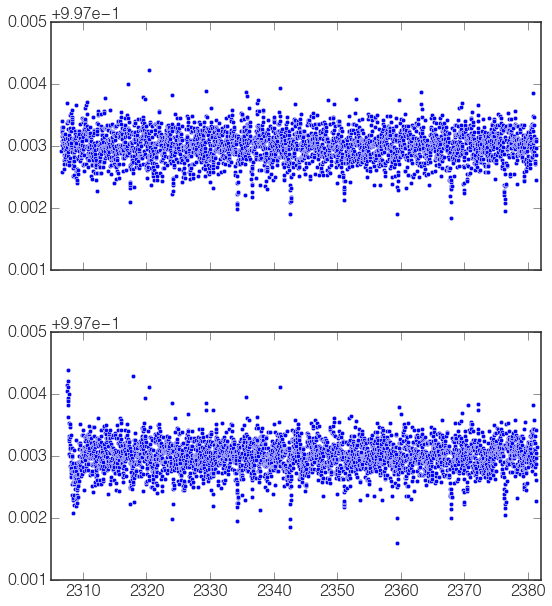

In [70]:
fig, [ax1, ax2] = plt.subplots(2, 1, figsize=[8,10], sharex=True, sharey=True)
ax1.scatter(t.T[0], t.T[1], s=20)

ax2.scatter(t1.T[0], t1.T[1], s=20)

ax1.set_ylim(0.998,1.002)
ax1.set_xlim(2305,2382)

In [74]:
print(MAD(t.T[1]) / 3.)

5.5175e-05


In [286]:
rvdat = np.array([
[2457414.927751,   14.84,    0.68],
[2457422.855362,   -17.18,     0.72],
[2457439.964043,     1.92,     0.82],
[2457495.743272,   -1.539,   24.133],
[2457498.729824,  -30.008,   27.269],
[2457505.670536,  -83.664,   39.032],
[2457507.723056,   27.440,   29.891],
[2457520.740837,  -12.297,   31.743],
[2457524.687701,   -0.044,   31.637],
[2457525.68652,   67.387,   30.055]
])



<Container object of 3 artists>

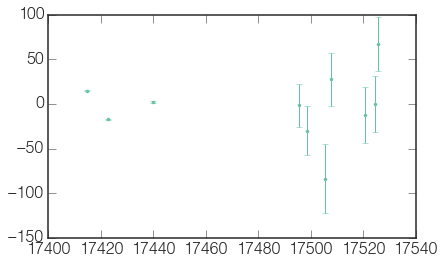

In [72]:
plt.errorbar(rvs.T[0], rvs.T[1], yerr=rvs.T[2], fmt='.')

In [79]:
import george
from george.kernels import ExpSquaredKernel

In [80]:
ExpSquaredKernel()

TypeError: __init__() takes at least 2 arguments (1 given)

In [141]:
import claretquadpy

In [353]:
fn = 'koi2113_np1_priorTrue_dil0.0GP.hdf5'


f = h5py.File(fn)
g = f['mcmc']['chain'][:]
lnprob = f['mcmc']['lnprob'][:]

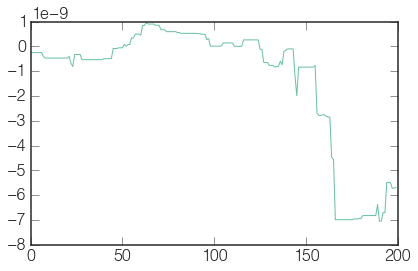

In [354]:
#plt.hist(g[:,-100:-1,9].flatten(),bins=20)
q = plt.plot(g[10,:,1])

In [355]:
f['mcmc']['fit_sol_0'][:]

array([  2.22000000e-02,   1.00000000e-10,   6.31553173e-01,
         1.18676223e-01,   0.00000000e+00,   1.60000000e-04,
         4.40000000e-02,   2.00000000e-04,   3.00000000e+00,
         2.30906152e+03,   8.40477896e+00,   9.20759558e-01,
         3.15254574e-02,   4.80000000e-02,  -4.50000000e-02,
         1.03000000e+02,   1.00000000e+01,   1.00000000e+01,
         1.00000000e+01])

In [356]:
lnprob
mle_idx = np.unravel_index(lnprob.argmax(),
            lnprob.shape)
mle = g[mle_idx]
print(mle)

[  2.27170467e-02  -5.71691062e-09   2.47649261e-01   6.48247283e-01
  -2.68298990e+01   2.03228102e-04   4.40419165e-02   2.30907523e+03
   8.40566475e+00   8.99280674e-01   4.04962331e-02  -2.33891273e-02
  -5.80584131e-03  -2.65192192e+00   3.17244248e+01   7.29140546e+01
   1.42865594e+02   1.77309578e-04   1.49830167e+01]


(array([  250.,  1334.,   821.,   770.,  1015.,  1363.,  1881.,  1561.,
         1494.,  1260.,   882.,   511.,   379.,   231.,    83.,    65.,
           65.,    13.,     9.,    13.]),
 array([ 0.0439931 ,  0.04399784,  0.04400258,  0.04400732,  0.04401205,
         0.04401679,  0.04402153,  0.04402627,  0.04403101,  0.04403574,
         0.04404048,  0.04404522,  0.04404996,  0.0440547 ,  0.04405943,
         0.04406417,  0.04406891,  0.04407365,  0.04407839,  0.04408313,
         0.04408786]),
 <a list of 20 Patch objects>)

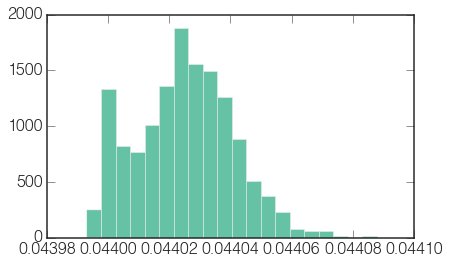

In [360]:
plt.hist(g[:,-200:,6].flatten(),bins=20)
#[print(np.median(g[:,-100:,i])) for i in np.arange(19)]

In [205]:
rvdat + 2440000

array([[ 2457414.927751,  2440014.84    ,  2440000.68    ],
       [ 2457422.855362,  2439982.82    ,  2440000.72    ],
       [ 2457439.964043,  2440001.92    ,  2440000.82    ],
       [ 2457495.743272,  2439998.461   ,  2440024.133   ],
       [ 2457498.729824,  2439969.992   ,  2440027.269   ],
       [ 2457505.670536,  2439916.336   ,  2440039.032   ],
       [ 2457507.723056,  2440027.44    ,  2440029.891   ],
       [ 2457520.740837,  2439987.703   ,  2440031.743   ],
       [ 2457524.687701,  2439999.956   ,  2440031.637   ],
       [ 2457525.68652 ,  2440067.387   ,  2440030.055   ]])

In [352]:
f.close()

In [361]:
from ktransit import LCModel, FitTransit

chain_vals = mle
time = t.T[0]
rvtime = rvdat.T[0]

M = LCModel()
M.add_star(rho=chain_vals[0],zpt=chain_vals[1],ld1=chain_vals[2],
    ld2=chain_vals[3],veloffset=chain_vals[4])
M.add_planet(T0=chain_vals[7],period=chain_vals[8],impact=chain_vals[9],
    rprs=chain_vals[10],ecosw=chain_vals[11],esinw=chain_vals[12],
    rvamp=chain_vals[13],occ=chain_vals[14],ell=chain_vals[15],alb=chain_vals[16])
M.add_data(time=time)
M.add_rv(rvtime=rvtime)

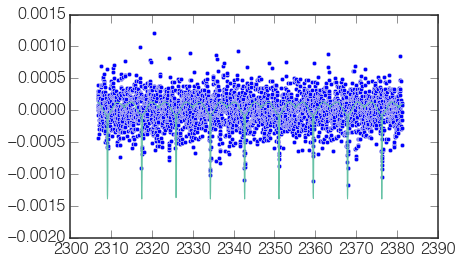

In [362]:
plt.plot(time,M.transitmodel)
plt.scatter(time,t.T[1]-1)

<Container object of 3 artists>

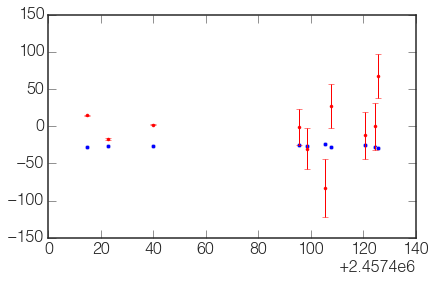

In [367]:
plt.scatter(rvtime,M.rvmodel)
plt.errorbar(rvtime,rvdat.T[1],yerr=rvdat.T[2],fmt='.',color='r')

In [368]:
import numpy as np
import sys
import ktransit
import h5py
import matplotlib.pyplot as plt
import george
from george.kernels import ExpSquaredKernel

def bin_data(phi,flux,bins,model=None):
    phi = np.array(phi)
    flux = np.array(flux)
    phibin = []
    fluxbin = []
    stdbin = []
    for i in (bins*np.arange(len(phi)/bins))+(bins/2):
        if model == None:
            goodpoints = np.ones(len(flux),dtype=bool)
        else:
            goodpoints = flux-model < 3* np.std(flux-model)
        flux2 = flux[goodpoints]
        phi2 = phi[goodpoints]
        phibin.append(np.median(phi2[i-bins/2:i+bins/2]))
        fluxbin.append(np.median(flux2[i-bins/2:i+bins/2]))
        stdbin.append(np.std(flux2[i-bins/2:i+bins/2]))
    return np.array(phibin), np.array(fluxbin), np.array(stdbin) / np.sqrt(bins)

def get_qf(time,flux,epoch,period,transitmodel=None):
    date1 = (time - epoch) + 0.5*period
    phi1 = (((date1 / period) - np.floor(date1/period)) * period) - 0.5*period
    q1 = np.sort(phi1)
    f1 = (flux[np.argsort(phi1)]) * -1.E6
    if transitmodel is not None:
        m1 = (transitmodel[np.argsort(phi1)]) * -1.E6
        return q1,f1,m1
    else:
        return q1,f1

def get_qf_rv(time,flux,err,epoch,period,rvmodel=None):
    date1 = (time - epoch) + 0.5*period
    phi1 = (((date1 / period) - np.floor(date1/period)) * period) - 0.5*period
    q1 = np.sort(phi1)
    f1 = (flux[np.argsort(phi1)])
    e1 = err[np.argsort(phi1)]
    if rvmodel is not None:
        m1 = (rvmodel[np.argsort(phi1)])
        return q1,f1,e1,m1
    else:
        return q1,f1,e1

def get_many_samples(gp1,gp2,time,resid,ferr,nsamples=300):
    kernel = gp1**2 * ExpSquaredKernel(gp2)
    gp = george.GP(kernel)

    slist = np.arange(len(time) // 1000)
    samples = np.zeros([nsamples,len(slist)*1000])
    for i in slist:
        section = np.arange(i*1000,i*1000 + 1000)
        gp.compute(time[section], ferr[:][section])
        samples[:,section] = gp.sample_conditional(
            resid[section],time[section],
            size=nsamples)
    return samples

def get_sample(gp1,gp2,time,resid,ferr):
    kernel = gp1**2 * ExpSquaredKernel(gp2)
    gp = george.GP(kernel)

    slist = np.arange(len(time) // 1000)
    sample = np.zeros(len(slist)*1000)
    for i in slist:
        section = np.arange(i*1000,i*1000 + 1000)
        gp.compute(time[section], ferr[:][section])
        sample[section] = gp.predict(
            resid[section],time[section])[0]
    return sample


def plot_transit_best(hf,ax,ylim=[9000,-1000],bins=900):
    with h5py.File(hf) as f:
        g = f['mcmc']['chain'][:]
        lnprob = f['mcmc']['lnprob'][:]
        mle_idx = np.unravel_index(lnprob.argmax(),
            lnprob.shape)
        mle = g[mle_idx]
        M = ktransit.LCModel()
        M.add_star(rho=mle[0],zpt=mle[1],ld1=mle[2],
            ld2=mle[3],veloffset=mle[4])
        M.add_planet(T0=mle[7],period=mle[8],impact=mle[9],
            rprs=mle[10],ecosw=mle[11],esinw=mle[12],
            rvamp=mle[13],
            occ=mle[14],ell=mle[15],alb=mle[16])
        M.add_data(time=f['time'][:])
        M.add_rv(rvtime=f['rvtime'][:])

        #resid = f['flux'][:] - M.transitmodel
        #sample = get_sample(
        #    mle[5],mle[6],M.time,resid,f['err'][:])
        #len_samp = len(sample)
        phi,ffold,fmod = get_qf(M.time,
            f['flux'][:],
            M.T0,
            M.period,
            transitmodel=M.transitmodel)

        ax.scatter(np.r_[phi,phi+M.period],
            np.r_[ffold,ffold],color='k',alpha=0.5,s=2)
        ax.plot(np.r_[phi,phi+M.period],
            np.r_[fmod,fmod],color='r')
        bq1,bf1,be1 = bin_data(phi,ffold,bins)
        ax.errorbar(np.r_[bq1,bq1+M.period],
            np.r_[bf1,bf1],yerr=np.r_[be1,be1],
            ls='',color='b')
        ax.set_xlim([-0.5*M.period,1.5*M.period])
        ax.set_ylim(ylim)
        ax.set_xlabel('Time from mid-transit (days)')
        ax.set_ylabel('Transit depth (ppm)')
        ax.minorticks_on()
    return ax

def plot_rv_best(hf,ax,ylim=[-420,420]):
    with h5py.File(hf) as f:
        g = f['mcmc']['chain'][:]
        lnprob = f['mcmc']['lnprob'][:]
        mle_idx = np.unravel_index(lnprob.argmax(),
            lnprob.shape)
        mle = g[mle_idx]
        M = ktransit.LCModel()
        M.add_star(rho=mle[0],zpt=mle[1],ld1=mle[2],
            ld2=mle[3],veloffset=mle[4])
        M.add_planet(T0=mle[7],period=mle[8],impact=mle[9],
            rprs=mle[10],ecosw=mle[11],esinw=mle[12],
            rvamp=mle[13],
            occ=mle[14],ell=mle[15],alb=mle[16])
        M.add_data(time=f['time'][:])
        M.add_rv(rvtime=f['rvtime'][:])
        tmod = M.transitmodel
        phi,ffold,efold,fmod = get_qf_rv(M.rvtime,
            f['rvval'][:] - mle[4],
            np.sqrt(f['rverr'][:]**2 + mle[-1]**2),
            M.T0,M.period,rvmodel=M.rvmodel- mle[4])

        M.add_rv(rvtime=np.arange(0,M.period,0.002))
        tmod = M.transitmodel
        phi2,fmod2,efol2 = get_qf_rv(M.rvtime,
            M.rvmodel-mle[4],
            M.rvmodel,
            M.T0,M.period)

        lphi2 = int(len(phi2) / 2.)
        ax.plot(np.r_[phi2,phi2+M.period],
            np.r_[fmod2,fmod2],color='r')


        ax.errorbar(np.r_[phi,phi+M.period],
            np.r_[ffold,ffold],
            yerr=np.r_[efold,efold],color='k',alpha=1,ls='',
            fmt='.')

        ax.set_xlim([-0.5*M.period,1.5*M.period])
        ax.set_ylim(ylim)
        ax.set_xlabel('Time from mid-transit (days)')
        ax.set_ylabel('Radial Velocity (m/s)')
        ax.minorticks_on()
    return ax

def plot_rv_best2(hf,ax,ylim=[-420,420]):
    with h5py.File(hf) as f:
        g = f['mcmc']['chain'][:]
        lnprob = f['mcmc']['lnprob'][:]
        mle_idx = np.unravel_index(lnprob.argmax(),
            lnprob.shape)
        mle = g[mle_idx]
        M = ktransit.LCModel()
        M.add_star(rho=mle[0],zpt=mle[1],ld1=mle[2],
            ld2=mle[3],veloffset=mle[4])
        M.add_planet(T0=mle[5],period=mle[6],impact=mle[7],
            rprs=mle[8],ecosw=mle[9],esinw=mle[10],
            rvamp=mle[11],
            occ=mle[12],ell=mle[13],alb=mle[14])
        M.add_data(time=f['time'][:])
        M.add_rv(rvtime=f['rvtime'][:])
        tmod = M.transitmodel
        phi,ffold,efold,fmod = get_qf_rv(M.rvtime,
            f['rvval'][:] - mle[4],
            np.sqrt(f['rverr'][:]**2 + mle[-1]**2),
            M.T0,M.period,rvmodel=M.rvmodel- mle[4])

        M.add_rv(rvtime=np.arange(0,M.period,0.002))
        tmod = M.transitmodel
        phi2,fmod2,efol2 = get_qf_rv(M.rvtime,
            M.rvmodel-mle[4],
            M.rvmodel,
            M.T0,M.period)

        lphi2 = int(len(phi2) / 2.)
        #ax.plot(phi2/M.period,fmod2,color='r')
        #ax.plot((phi2[0:lphi2]+M.period)/M.period,
        #    fmod2[0:lphi2],color='r',ls=':')
        #ax.plot((phi2[lphi2:]-M.period)/M.period,
        #    fmod2[lphi2:],color='r',ls=':')
        ax.plot(phi2,fmod2,color='r')
        ax.plot((phi2[0:lphi2]+M.period),
            fmod2[0:lphi2],color='r',ls=':')
        ax.plot((phi2[lphi2:]-M.period),
            fmod2[lphi2:],color='r',ls=':')

        # ax.errorbar(phi /M.period,
        #     ffold,
        #     yerr=efold,color='k',alpha=1,ls='')
        # ax.errorbar((np.r_[phi-M.period,phi+M.period]) / M.period,
        #     np.r_[ffold,ffold],yerr=np.r_[efold,efold],
        #     color='k',alpha=0.3,ls='')
        # ax.set_xlim([-1,1])

        ax.errorbar(phi,
            ffold,
            yerr=efold,color='k',alpha=1,ls='')
        ax.errorbar((np.r_[phi-M.period,phi+M.period]) ,
            np.r_[ffold,ffold],yerr=np.r_[efold,efold],
            color='k',alpha=0.3,ls='')
        #ax.set_xlim([-1,1])

        ax.set_ylim(ylim)
        ax.set_xlabel('Time from mid-transit (days)')
        ax.set_ylabel('Radial Velocity (m/s)')
        ax.minorticks_on()
    return ax

/Users/tom/.virtualenvs/p2/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/tom/.virtualenvs/p2/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/tom/.virtualenvs/p2/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


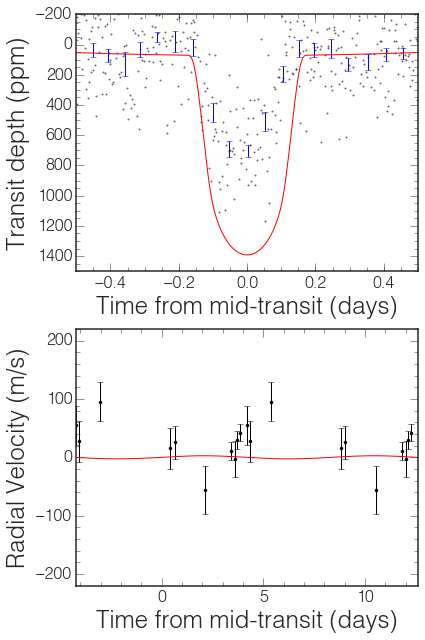

In [369]:
hf = 'koi2113_np1_priorTrue_dil0.0GP.hdf5'
fig, axes = plt.subplots(2, 1, figsize=[6,9])
#ax1 = plot_transit_best(hf,axes[0],ylim=[2000,-1500])
ax1 = plot_transit_best(hf,axes[0],ylim=[1500,-200], bins=20)
ax1.set_xlim(-0.5,0.5)
ax2 = plot_rv_best(hf,axes[1],ylim=[-220,220])
plt.tight_layout()

In [370]:
from __future__ import division, print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

import george
from george.kernels import ExpSquaredKernel, ExpKernel

from ktransit import LCModel, FitTransit

from scipy import optimize

import h5py

def get_sample(chain_vals,time,flux,ferr,rvtime):
    M = LCModel()
    M.add_star(rho=chain_vals[0],zpt=chain_vals[1],ld1=chain_vals[2],
        ld2=chain_vals[3],veloffset=chain_vals[4])
    M.add_planet(T0=chain_vals[7],period=chain_vals[8],impact=chain_vals[9],
        rprs=chain_vals[10],ecosw=chain_vals[11],esinw=chain_vals[12],
        rvamp=chain_vals[13],occ=chain_vals[14],ell=chain_vals[15],alb=chain_vals[16])
    M.add_data(time=time)
    M.add_rv(rvtime=rvtime)

    #kernel = ((chain_vals[5]**2 * RBFKernel(chain_vals[6])) +
    #        (chain_vals[7]**2 * RBFKernel(chain_vals[8])))
    #kernel = ((chain_vals[5]**2 * ExpKernel(chain_vals[6])) +
    #        (chain_vals[7]**2 * RBFKernel(chain_vals[8])))
    kernel = chain_vals[5]**2 * ExpSquaredKernel(chain_vals[6])
    gp = george.GP(kernel)

    sample = np.array([])
#     for i in np.arange(len(time) // 1000):
#         section = np.arange(i*1000,i*1000 + 1000)
#         gp.compute(time[section], ferr[:][section])
#         sample = np.r_[sample,gp.predict(
#             flux[:][section] - M.transitmodel[section],time[section])[0]]
    gp.compute(time, ferr[:])
    sample = np.r_[sample,gp.predict(
             flux[:] - M.transitmodel,time)[0]]
    return sample, M.transitmodel

def get_many_samples(chain_vals,time,flux,ferr,rvtime,nsamples=300):
    M = LCModel()
    M.add_star(rho=chain_vals[0],zpt=chain_vals[1],ld1=chain_vals[2],
        ld2=chain_vals[3],veloffset=chain_vals[4])
    M.add_planet(T0=chain_vals[7],period=chain_vals[8],impact=chain_vals[9],
        rprs=chain_vals[10],ecosw=chain_vals[11],esinw=chain_vals[12],
        rvamp=chain_vals[13],occ=chain_vals[14],ell=chain_vals[15],alb=chain_vals[16])
    M.add_data(time=time)
    M.add_rv(rvtime=rvtime)

    #kernel = ((chain_vals[5]**2 * RBFKernel(chain_vals[6])) +
    #        (chain_vals[7]**2 * RBFKernel(chain_vals[8])))
    #kernel = ((chain_vals[5]**2 * ExpKernel(chain_vals[6])) +
    #        (chain_vals[7]**2 * RBFKernel(chain_vals[8])))
    kernel = chain_vals[5]**2 * ExpSquaredKernel(chain_vals[6])
    gp = george.GP(kernel)

#     slist = np.arange(len(time) // 1000)
#     samples = np.zeros([nsamples,len(slist)*1000])
#     for i in slist:
#         section = np.arange(i*1000,i*1000 + 1000)
#         gp.compute(time[section], ferr[:][section])
#         samples[:,section] = gp.sample_conditional(
#             flux[:][section] - M.transitmodel[section],time[section],
#             size=nsamples)
    gp.compute(time, ferr[:])
    samples = gp.sample_conditional(
            flux[:] - M.transitmodel,time,
            size=nsamples)
    return samples, M.transitmodel


def get_rv():
    pass


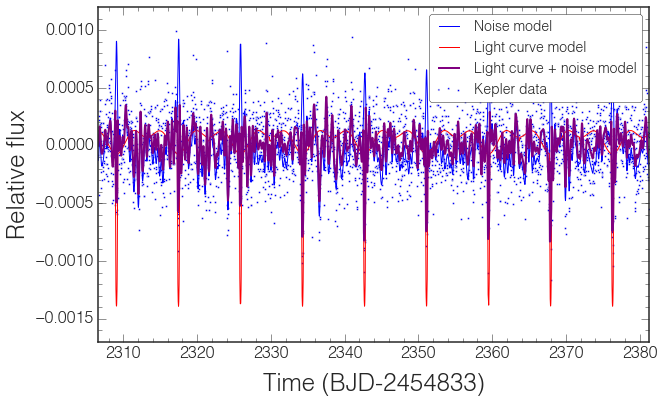

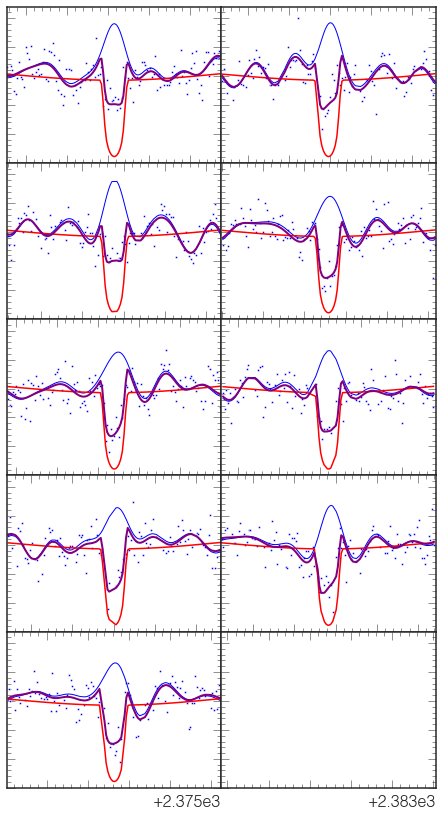

In [371]:
hf = 'koi2113_np1_priorTrue_dil0.0GP.hdf5'
f = h5py.File(hf)
g = f['mcmc']['chain'][:]
lnprob = f['mcmc']['lnprob'][:]

mle_idx = np.unravel_index(lnprob.argmax(),
        lnprob.shape)

mle = g[mle_idx]

time = f['time'][:]
flux = f['flux'][:]
ferr = f['err'][:]
rvtime = f['rvtime']

doplot = True
plot_many = False
if plot_many and doplot:
    samples, tmod = get_many_samples(mle,time,flux,ferr,rvtime,
        nsamples=300)

    time = f['time']#[:61000]
    flux = f['flux']#[:61000]
    tmod1 = tmod#[:61000]

    fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=False,
        figsize=[9,6])
    ax1.scatter(time,flux,s=3,label='Kepler data')
    med = np.median(samples+tmod1,axis=0)
    stdm = np.std(samples+tmod1,axis=0)
    ax1.plot(time,med,color='purple',
            label='Light curve + noise model',lw=1,
            alpha=0.6)
    ax1.fill_between(time,med-stdm,med+stdm,
        alpha=0.3,color='purple')
    #ax1.set_xlim([583.8,596.9])
    ax1.legend()
    ax1.set_xlabel('Time (BJD-2454833)',labelpad=12)
    ax1.set_ylabel('Relative flux')
    ax1.minorticks_on()


elif not plot_many and doplot:
    sample, tmod = get_sample(mle,time,flux,ferr,rvtime)

    time = f['time']#[:61000]
    flux = f['flux']#[:61000]
    tmod1 = tmod#[:61000]
    fig, (ax1) = plt.subplots(1, 1, sharex=True, sharey=False,
        figsize=[9,6])
    ax1.scatter(time,flux,s=4,label='Kepler data')
    ax1.plot(time,sample,color='b',label='Noise model')
    ax1.plot(time,tmod1,color='r',
        label='Light curve model')
    ax1.plot(time,sample+tmod1,color='purple',
        label='Light curve + noise model',lw=2)
    ax1.set_xlim(np.min(time),np.max(time))
    ax1.set_ylim(-0.0017,0.0012)
    ax1.legend()
    ax1.set_xlabel('Time (BJD-2454833)',labelpad=12)
    ax1.set_ylabel('Relative flux')
    ax1.minorticks_on()

many_plots = True
if many_plots:
    period = mle[8]
    T0 = mle[7]
    fig, (axes) = plt.subplots(5, 2, sharex=False, sharey=True,
        figsize=[7,14])
    axes = axes.flatten()
    for i,offset in enumerate(T0 + period*np.arange(0,10,1)):
#         if i == 2:
#             offset = T0 + period*77
#         elif i == 7:
#             offset = T0 + period*78
        win = 1.3
        trange = (time < offset+win) & (time > offset-win)

        axes[i].scatter(time[trange],flux[trange]
            ,s=4,label='Kepler data')
        axes[i].plot(time[trange],sample[trange],
            color='b',label='Noise model')
        axes[i].plot(time[trange],tmod1[trange],
            color='r',lw=1.5,
            label='Light curve model')
        axes[i].plot(time[trange],sample[trange]+tmod1[trange],
            color='purple',
            label='Light curve + noise model',lw=2)
        axes[i].set_xlim([offset-win,offset+win])
        axes[i].tick_params(labelbottom=False,labelleft=False)
        axes[i].minorticks_on()
    axes[i].set_ylim([-0.0015,0.0012])
    plt.subplots_adjust(wspace=0, hspace=0)